# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


Untaring file...


### 2. Visualize the First 24 Training Images

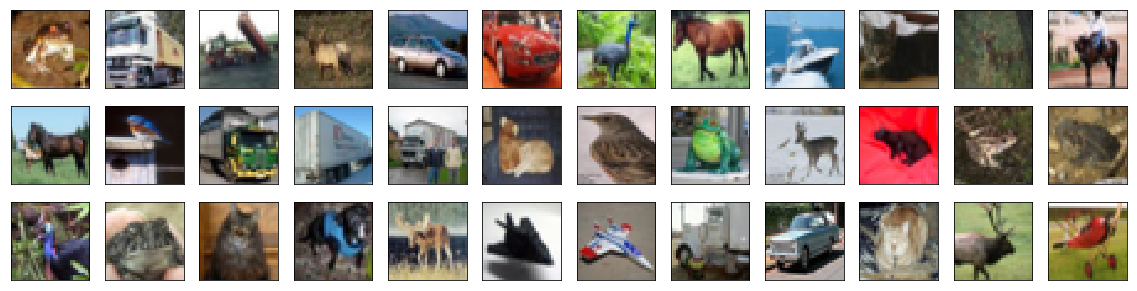

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [7]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Activation

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.23))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
__________

### 6. Compile the Model 

In [13]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [14]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 1.19387, saving model to model.weights.best.hdf5
19s - loss: 1.5801 - acc: 0.4227 - val_loss: 1.1939 - val_acc: 0.5712
Epoch 2/100
Epoch 00001: val_loss improved from 1.19387 to 1.06417, saving model to model.weights.best.hdf5
19s - loss: 1.2274 - acc: 0.5608 - val_loss: 1.0642 - val_acc: 0.6310
Epoch 3/100
Epoch 00002: val_loss improved from 1.06417 to 0.91205, saving model to model.weights.best.hdf5
19s - loss: 1.0628 - acc: 0.6243 - val_loss: 0.9121 - val_acc: 0.6760
Epoch 4/100
Epoch 00003: val_loss improved from 0.91205 to 0.86975, saving model to model.weights.best.hdf5
19s - loss: 0.9661 - acc: 0.6607 - val_loss: 0.8698 - val_acc: 0.6972
Epoch 5/100
Epoch 00004: val_loss improved from 0.86975 to 0.78890, saving model to model.weights.best.hdf5
19s - loss: 0.8962 - acc: 0.6870 - val_loss: 0.7889 - val_acc: 0.7198
Epoch 6/100
Epoch 00005: val_loss improved from 0.78890 to 0.7827

Epoch 00061: val_loss did not improve
19s - loss: 0.3961 - acc: 0.8613 - val_loss: 0.6738 - val_acc: 0.7996
Epoch 63/100
Epoch 00062: val_loss did not improve
19s - loss: 0.3984 - acc: 0.8611 - val_loss: 0.6887 - val_acc: 0.7862
Epoch 64/100
Epoch 00063: val_loss did not improve
19s - loss: 0.3916 - acc: 0.8612 - val_loss: 0.7151 - val_acc: 0.7930
Epoch 65/100
Epoch 00064: val_loss did not improve
19s - loss: 0.3907 - acc: 0.8641 - val_loss: 0.6971 - val_acc: 0.7942
Epoch 66/100
Epoch 00065: val_loss did not improve
19s - loss: 0.4000 - acc: 0.8593 - val_loss: 0.7212 - val_acc: 0.7826
Epoch 67/100
Epoch 00066: val_loss did not improve
19s - loss: 0.3983 - acc: 0.8623 - val_loss: 0.6558 - val_acc: 0.7964
Epoch 68/100
Epoch 00067: val_loss did not improve
19s - loss: 0.3942 - acc: 0.8621 - val_loss: 0.6924 - val_acc: 0.7946
Epoch 69/100
Epoch 00068: val_loss did not improve
19s - loss: 0.3902 - acc: 0.8629 - val_loss: 0.6945 - val_acc: 0.7894
Epoch 70/100
Epoch 00069: val_loss did not im

### 8. Load the Model with the Best Validation Accuracy

In [15]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [16]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.776


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [17]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

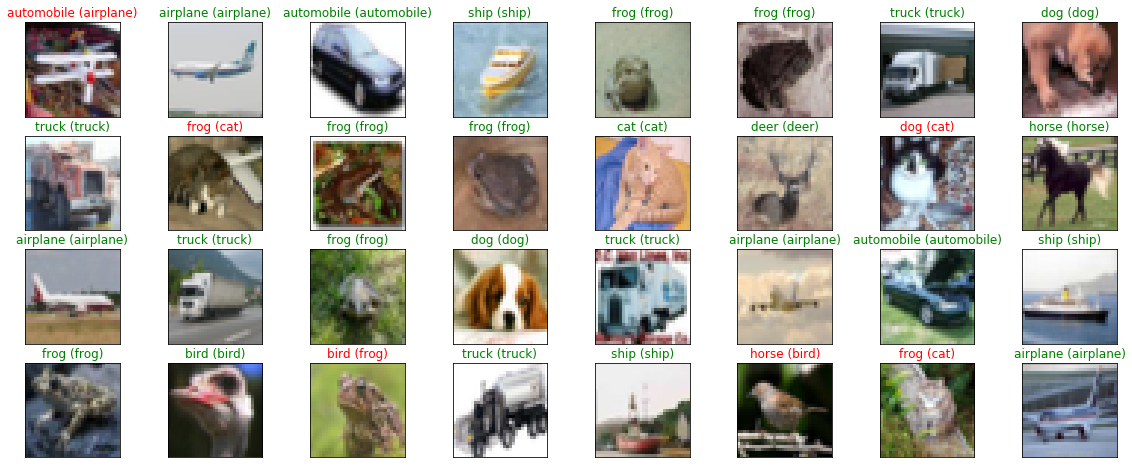

In [18]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))